In [1]:
import glob
from pathlib import Path

import cv2
import imageio
import numpy as np
import torch
from matplotlib import pyplot as plt

from inverse_warp import inverse_warp
from mc.visualisation import load_pose_exp_net, load_disp_net, sfm_learner, INTRINSICS, tensor_to_frame, frame_to_tensor, rad, convert_rgb_to_gray_rgb

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [2]:
img_paths = [Path(p) for p in glob.glob("mc_predefined_agent_actions_v3/left/3/frames/*.png")]
img_paths.sort(key=lambda p: int(p.name[:p.name.rfind(".")]))
imgs = [imageio.imread(path) for path in img_paths]

In [3]:
rot_img_paths = [Path(p) for p in glob.glob("mc_predefined_agent_actions_v3/camera_yaw_5_repeated/0/frames/*.png")]
rot_img_paths.sort(key=lambda p: int(p.name[:p.name.rfind(".")]))
rot_imgs = [imageio.imread(path) for path in rot_img_paths]

In [4]:
pose_net = load_pose_exp_net(
    "checkpoints/Navigate_dataset,15epochs,m1.0/07-06-11:54-759618/exp_pose_model_best.pth.tar")
disp_net = load_disp_net("checkpoints/Navigate_dataset,15epochs,m1.0/07-06-11:54-759618/dispnet_model_best.pth.tar")

pose net epoch 7
disp net epoch 7


In [5]:
import plotly.graph_objects as go
from PIL import Image as PImage


def plot_3d_mapped_image(img, depth):
    img = np.flipud(img)
    img = img.swapaxes(0, 1)[:, ::-1]

    depth = np.flipud(depth)
    depth = depth.swapaxes(0, 1)[:, ::-1]
    depth = depth.copy().astype("float")

    eight_bit_img = PImage.fromarray(img).convert("P", palette="WEB", dither=None)
    idx_to_color = np.array(eight_bit_img.getpalette()).reshape((-1, 3))
    colorscale = [[i / 255.0, "rgb({}, {}, {})".format(*rgb)] for i, rgb in enumerate(idx_to_color)]

    surf = go.Surface(
        z=depth,
        surfacecolor=np.array(eight_bit_img),
        cmin=0,
        cmax=255,
        colorscale=colorscale,
        showscale=False,
    )

    fig = go.Figure(data=[surf])

    fig.write_html("3d_img.html")


def gray(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

In [6]:
idx = 4
pred_res = sfm_learner([imgs[idx - 4], imgs[idx], imgs[idx + 4]], disp_net, pose_net)

In [7]:
plot_3d_mapped_image(gray(pred_res[0]), pred_res[3][:, :, 0])

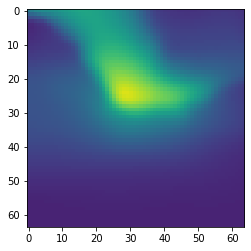

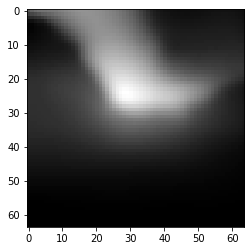

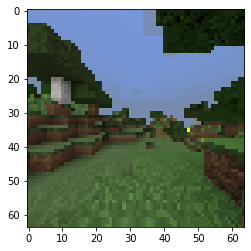

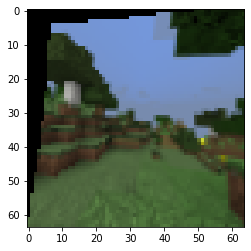

In [8]:
plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()

In [9]:
idx = 4
pred_res = sfm_learner([imgs[idx - 1], imgs[idx], imgs[idx + 1]], disp_net, pose_net)

In [10]:
plot_3d_mapped_image(gray(pred_res[0]), pred_res[3][:, :, 0])

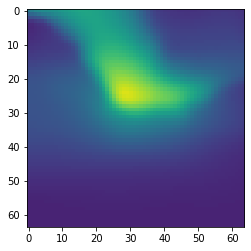

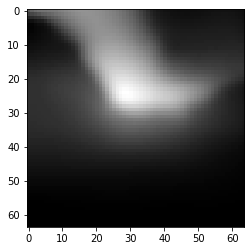

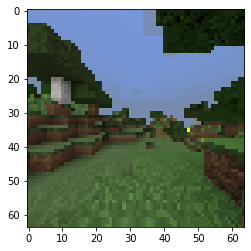

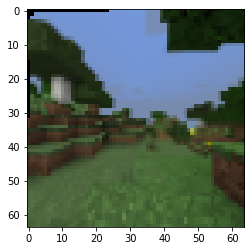

In [11]:
plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()

## value range

In [12]:
img_tensors = [torch.from_numpy(np.transpose(img, (2, 0, 1))).unsqueeze(0) for img in imgs]
img_tensors = [((img / 255 - 0.5) / 0.5).to(device) for img in img_tensors]

In [13]:
depths = [disp_net(img)[0] for img in img_tensors]
ranges = [[float(d.min()), float(d.max())] for d in depths]
print(np.min(ranges, axis=0))
print(np.max(ranges, axis=0))

[0.71301508 7.49019337]
[ 1.41140079 10.01000023]


## no movement

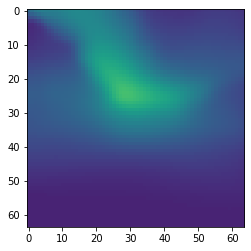

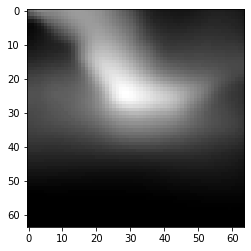

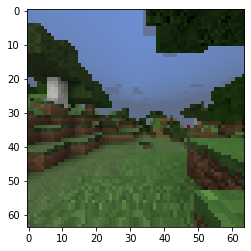

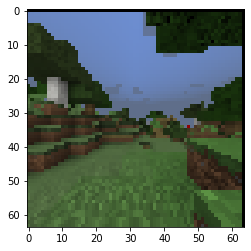

array([ 7.77044235e-05, -2.14005626e-05,  7.39047424e-06,  4.34545664e-05,
        4.89098475e-05,  3.84125480e-05])

In [14]:
pred_res_no_mov1 = sfm_learner([imgs[0]] * 3, disp_net, pose_net)

plt.imshow(pred_res_no_mov1[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res_no_mov1[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res_no_mov1[0])
plt.show()

plt.imshow(pred_res_no_mov1[2])
plt.show()

pred_res_no_mov1[5]

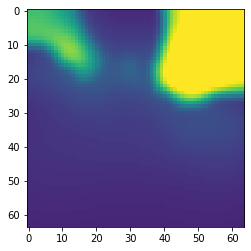

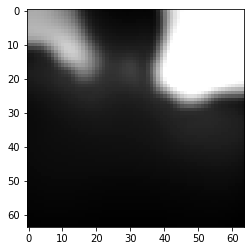

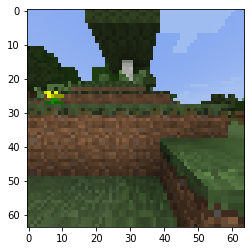

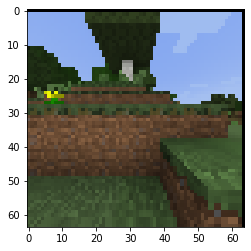

array([ 7.77044235e-05, -2.14005626e-05,  7.39047424e-06,  4.34545664e-05,
        4.89098475e-05,  3.84125480e-05])

In [15]:
pred_res_no_mov2 = sfm_learner([imgs[42]] * 3, disp_net, pose_net)

plt.imshow(pred_res_no_mov2[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res_no_mov2[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res_no_mov2[0])
plt.show()

plt.imshow(pred_res_no_mov2[2])
plt.show()

pred_res_no_mov2[5]

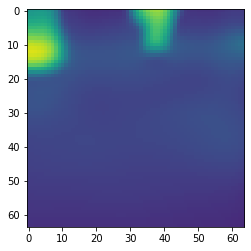

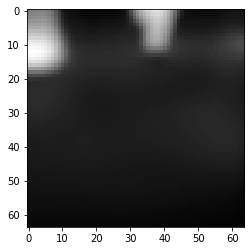

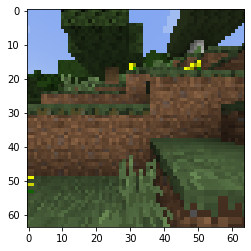

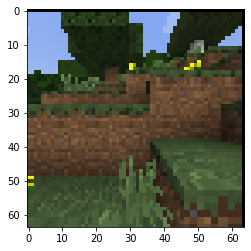

array([ 7.77044235e-05, -2.14005626e-05,  7.39047424e-06,  4.34545664e-05,
        4.89098475e-05,  3.84125480e-05])

In [16]:
pred_res_no_mov3 = sfm_learner([imgs[80]] * 3, disp_net, pose_net)

plt.imshow(pred_res_no_mov3[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res_no_mov3[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res_no_mov3[0])
plt.show()

plt.imshow(pred_res_no_mov3[2])
plt.show()

pred_res_no_mov3[5]

In [17]:
print(pred_res_no_mov1[5] == pred_res_no_mov2[5])
print(pred_res_no_mov1[5] == pred_res_no_mov3[5])

[ True  True  True  True  True  True]
[ True  True  True  True  True  True]


## Big movement

4 frames skip

In [18]:
idx = 4
pred_res = sfm_learner([imgs[idx - 4], imgs[idx], imgs[idx + 4]], disp_net, pose_net)

depth_map = pred_res[3][:, :, 0][..., np.newaxis]
depth_map = np.transpose(depth_map, (2, 0, 1))
depth_map = torch.from_numpy(depth_map.astype(np.float32))

In [19]:
pose = np.array([-10, 0, 0, 0, 0, 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(imgs[idx]), depth_map, pose, INTRINSICS)

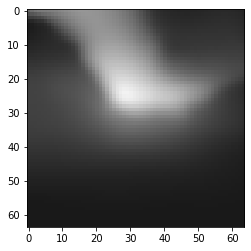

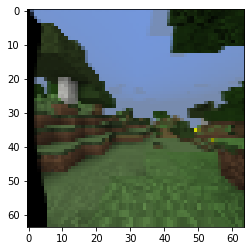

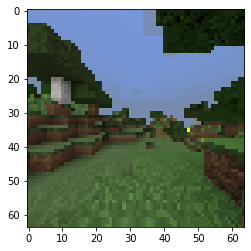

In [20]:
plt.imshow(pred_res[3])
plt.show()

plt.imshow(tensor_to_frame(warped_frame_tensor))
plt.show()

plt.imshow(pred_res[0])
plt.show()

no frames skip

In [21]:
idx = 4
pred_res = sfm_learner([imgs[idx - 1], imgs[idx], imgs[idx + 1]], disp_net, pose_net)

depth_map = pred_res[3][:, :, 0][..., np.newaxis]
depth_map = np.transpose(depth_map, (2, 0, 1))
depth_map = torch.from_numpy(depth_map.astype(np.float32))

In [22]:
pose = np.array([-10, 0, 0, 0, 0, 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(imgs[idx]), depth_map, pose, INTRINSICS)

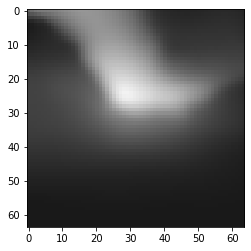

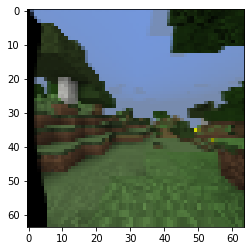

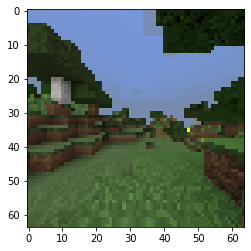

In [23]:
plt.imshow(pred_res[3])
plt.show()

plt.imshow(tensor_to_frame(warped_frame_tensor))
plt.show()

plt.imshow(pred_res[0])
plt.show()

## test different depth scales

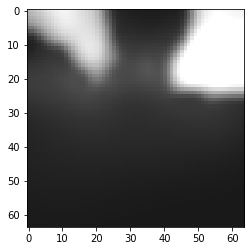

In [24]:
# depths = [1 / disp_net(img)[0] for img in img_tensors]

depth_img = 1.0 / depths[50].squeeze(0).detach().numpy()
depth_img[depth_img > 1] = 1
depth_img = cv2.cvtColor((depth_img * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

plt.imshow(depth_img)
plt.show()

In [25]:
np.max(depth_img)

255

## check if network is too much color biased


### rotate the image

### sky color

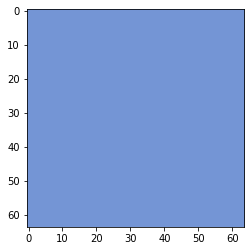

In [26]:
color_img = np.full((64, 64, 3), (116, 149, 213))

plt.imshow(color_img)
plt.show()

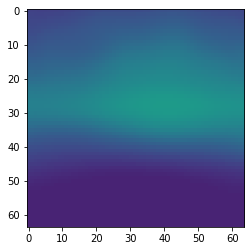

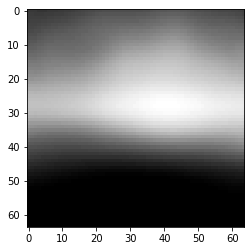

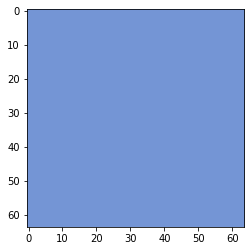

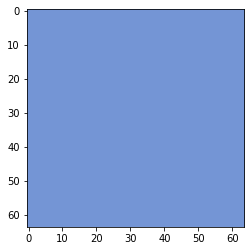

In [27]:
pred_res = sfm_learner([color_img] * 3, disp_net, pose_net)

plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()

### dirt color

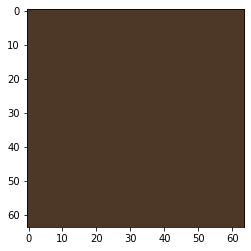

In [28]:
color_img = np.full((64, 64, 3), (77, 55, 38))

plt.imshow(color_img)
plt.show()

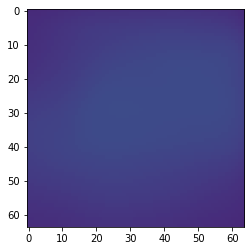

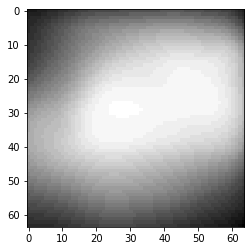

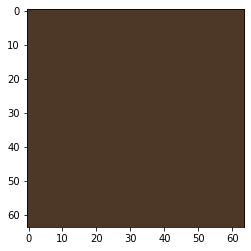

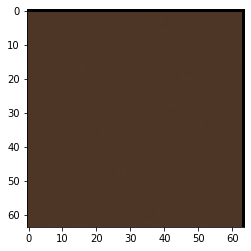

In [29]:
pred_res = sfm_learner([color_img] * 3, disp_net, pose_net)

plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()

### grass color

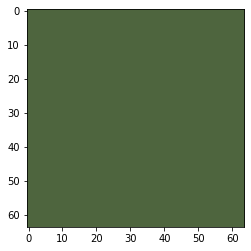

In [30]:
color_img = np.full((64, 64, 3), (78, 101, 62))

plt.imshow(color_img)
plt.show()

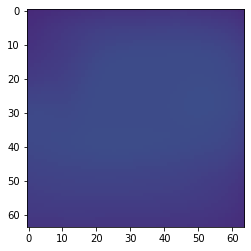

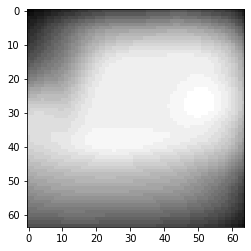

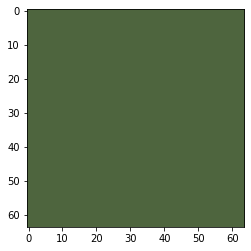

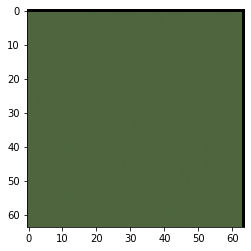

In [31]:
pred_res = sfm_learner([color_img] * 3, disp_net, pose_net)

plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()


### tree leaf color 1

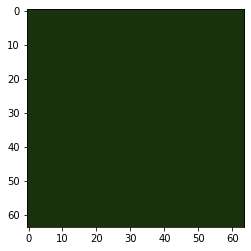

In [32]:
color_img = np.full((64, 64, 3), (25, 49, 13))

plt.imshow(color_img)
plt.show()

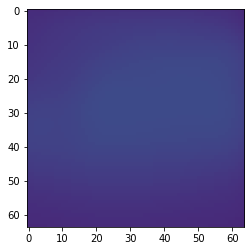

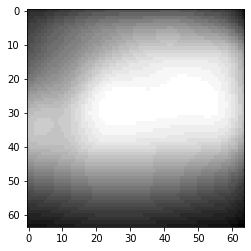

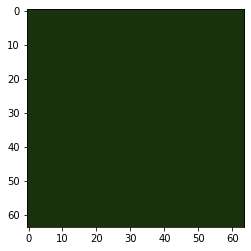

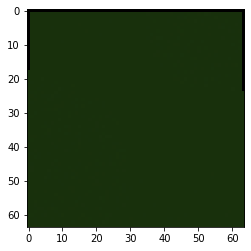

In [33]:
pred_res = sfm_learner([color_img] * 3, disp_net, pose_net)

plt.imshow(pred_res[3][:, :, 0], vmin=0, vmax=255)
plt.show()

plt.imshow(pred_res[3][:, :, 0], cmap="gray")
plt.show()

plt.imshow(pred_res[0])
plt.show()

plt.imshow(pred_res[2])
plt.show()

## change camera intrinsics

In [34]:
FOV = 40
IMG_SIZE = 64
focal_length = (FOV / 2) / np.tan((IMG_SIZE / 2))

camera_intrinsics = np.array([[focal_length, 0, IMG_SIZE / 2],
                              [0, focal_length, IMG_SIZE / 2],
                              [0, 0, 1]])
camera_intrinsics = torch.from_numpy(camera_intrinsics.astype(np.float32)).unsqueeze(0)

In [35]:
idx = 4
pred_res = sfm_learner([imgs[idx - 1], imgs[idx], imgs[idx + 1]], disp_net, pose_net)

depth_map = pred_res[3][:, :, 0][..., np.newaxis]
depth_map = np.transpose(depth_map, (2, 0, 1))
depth_map = torch.from_numpy(depth_map.astype(np.float32))

In [36]:
pose = np.array([-10, 0, 0, 0, 0, 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(imgs[idx]), depth_map, pose, camera_intrinsics)

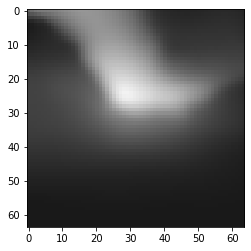

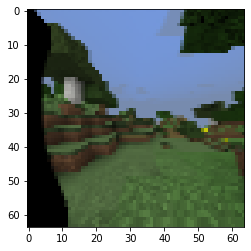

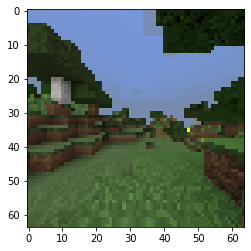

In [37]:
plt.imshow(pred_res[3])
plt.show()

plt.imshow(tensor_to_frame(warped_frame_tensor))
plt.show()

plt.imshow(pred_res[0])
plt.show()

sfm learner predicted pose

In [38]:
print(pred_res[5])

pose = torch.from_numpy(pred_res[5].astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(imgs[idx]), depth_map, pose, camera_intrinsics)

[-0.00319721 -0.00191501  0.0108779   0.0053388  -0.01446371 -0.01307866]


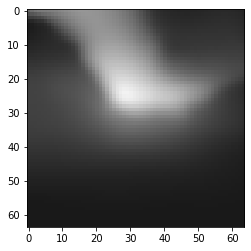

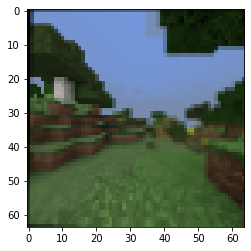

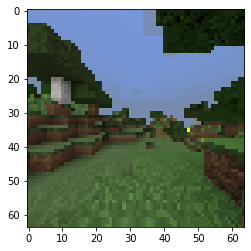

In [39]:
plt.imshow(pred_res[3])
plt.show()

plt.imshow(tensor_to_frame(warped_frame_tensor))
plt.show()

plt.imshow(pred_res[0])
plt.show()

### rotation

sfm learner vs modified camera intrinsics

In [40]:
idx = 4
pred_res = sfm_learner([rot_imgs[idx - 1], rot_imgs[idx], rot_imgs[idx + 1]], disp_net, pose_net)

depth_map = pred_res[3][:, :, 0][..., np.newaxis]
depth_map = np.transpose(depth_map, (2, 0, 1))
depth_map = torch.from_numpy(depth_map.astype(np.float32))

In [41]:
pose = np.array([0, 0, 0, 0, rad(5), 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(rot_imgs[idx]), depth_map, pose, camera_intrinsics)
warped_frame = tensor_to_frame(warped_frame_tensor)
valid_points = np.transpose(valid_points.numpy(), (1, 2, 0))

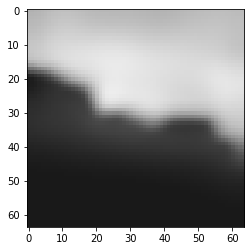

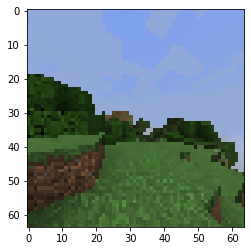

In [42]:
plt.imshow(pred_res[3])
plt.show()

plt.imshow(pred_res[0])
plt.show()

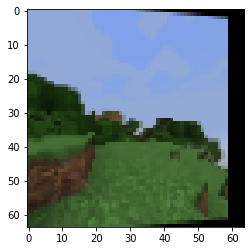

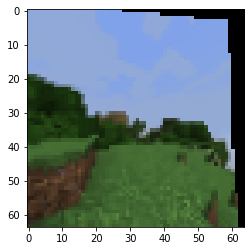

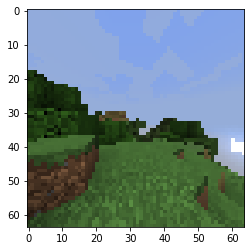

In [43]:
plt.imshow(warped_frame)
plt.show()

plt.imshow(pred_res[2])
plt.show()

plt.imshow(pred_res[1])
plt.show()

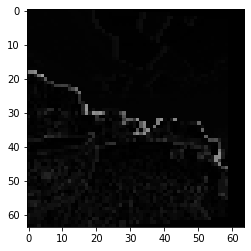

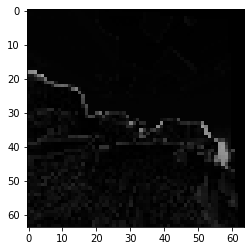

In [44]:
warped_diff = cv2.absdiff(pred_res[1], warped_frame) * valid_points
warped_diff_img = convert_rgb_to_gray_rgb(warped_diff)

plt.imshow(warped_diff_img)
plt.show()

warped_diff = cv2.absdiff(pred_res[1], pred_res[2]) * pred_res[4]
warped_diff_img = convert_rgb_to_gray_rgb(warped_diff)

plt.imshow(warped_diff_img)
plt.show()


modified camera intrinsics vs old intrinsics

In [45]:
idx = 4
pred_res = sfm_learner([rot_imgs[idx - 1], rot_imgs[idx], rot_imgs[idx + 1]], disp_net, pose_net)

depth_map = pred_res[3][:, :, 0][..., np.newaxis]
depth_map = np.transpose(depth_map, (2, 0, 1))
depth_map = torch.from_numpy(depth_map.astype(np.float32))

In [46]:
pose = np.array([0, 0, 0, 0, rad(5), 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(rot_imgs[idx]), depth_map, pose, camera_intrinsics)
warped_frame_mod_intrinsics = tensor_to_frame(warped_frame_tensor)
valid_points_mod_intrinsics = np.transpose(valid_points.numpy(), (1, 2, 0))

In [47]:
pose = np.array([0, 0, 0, 0, rad(5), 0])
pose = torch.from_numpy(pose.astype(np.float32)).unsqueeze(0)

warped_frame_tensor, valid_points = inverse_warp(frame_to_tensor(rot_imgs[idx]), depth_map, pose, INTRINSICS)
warped_frame_old_intrinsics = tensor_to_frame(warped_frame_tensor)
valid_points_old_intrinsics = np.transpose(valid_points.numpy(), (1, 2, 0))

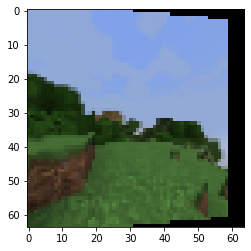

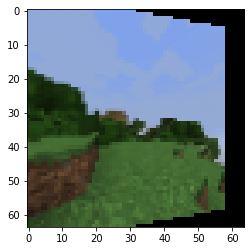

In [48]:
plt.imshow(warped_frame_mod_intrinsics * valid_points_mod_intrinsics)
plt.show()

plt.imshow(warped_frame_old_intrinsics * valid_points_old_intrinsics)
plt.show()

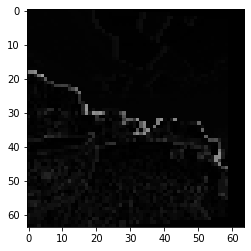

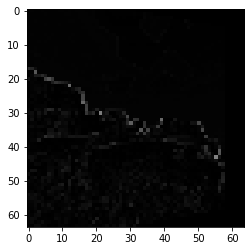

In [49]:
warped_diff = cv2.absdiff(pred_res[1], warped_frame_mod_intrinsics) * valid_points_mod_intrinsics
warped_diff_img = convert_rgb_to_gray_rgb(warped_diff)

plt.imshow(warped_diff_img)
plt.show()

warped_diff = cv2.absdiff(pred_res[1], warped_frame_old_intrinsics) * valid_points_old_intrinsics
warped_diff_img = convert_rgb_to_gray_rgb(warped_diff)

plt.imshow(warped_diff_img)
plt.show()